In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
from pylab import meshgrid, cm, imshow, contour, clabel, colorbar, axis, show
import random

In [2]:
# Step-by-step function definition
def z_func(x,y):
    a = np.exp(-((x - 2.5) ** 2 + (y + 1.5) ** 2) / 5)
    b = 1 + (np.sin(0.08 * np.pi * x * y)) ** 2
    c = 1 + ((x ** 2 + y ** 2) / 100) ** (0.1)
    d = np.log(2 + (10*(x- 2.4)) ** 4 + (10 * (y + 1.3)) ** 4)
    return 20 * a + 3 * b + 3 * (d / c)

In [12]:
# Step 1
#
# Grid of point
x = np.arange(-5.0,5.0,0.05)
y = np.arange(-5.0,5.0,0.05)
X, Y = meshgrid(x, y) 

In [15]:
Z = z_func(X, Y) # Evaluation of the function on the grid
im = imshow(Z,cmap=cm.RdBu) # drawing the function
cset = contour(Z, np.arange(-1.5,1.5,0.01), linewidths=2, cmap=cm.Set2)
colorbar(im) # Adding the colobar on the right


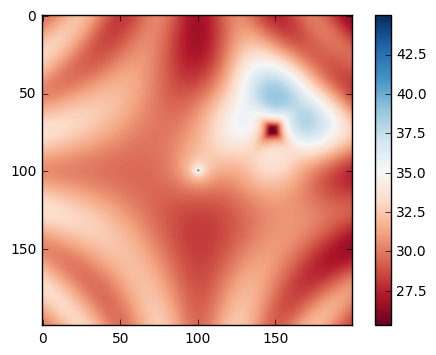

In [16]:
show()

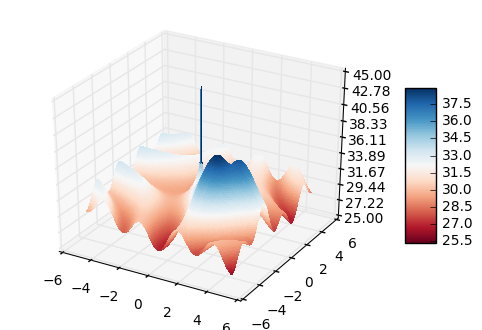

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, z_func(X, Y), rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [62]:
# Step 2
iteration_count = 100000
x_answer = -2.5
y_answer = 2.5
result_max = z_func(x_answer, y_answer)

In [63]:
print("z_func(", x_answer, ";", y_answer, ")=", result_max)

z_func( -2.5 ; 2.5 )= 32.2866275606


In [64]:
for i in range(iteration_count):
    x_c = random.uniform(-5, 5)
    y_c = random.uniform(-5, 5)
    z_c = z_func(x_c, y_c)
    if z_c > result_max:
        result_max = z_c
        x_answer = x_c
        y_answer = y_c

In [65]:
print("z_func(", x_answer, ",", y_answer, ")=", result_max)

z_func( 2.5034594736658473 , -2.3916669726564233 )= 38.9042059379


In [66]:
print("z_func(", 0, ",", 0, ")=", z_func(0, 0))

z_func( 0 , 0 )= 45.0380720831


In [132]:
# Step 3
point_count = 300
mu, sigma = 0, 50

In [133]:
x_dots = np.random.normal(mu, sigma, point_count)
y_dots = np.random.normal(mu, sigma, point_count)

In [134]:
def show_plot(xs, ys):
    plt.plot(xs, ys, 'ro')
    plt.show()

In [135]:
def get_dots(xs, ys):
    res = []
    for x, y in np.vstack(([xs.T], [ys.T])).T:
        res.append([z_func(x, y), x, y])
    return np.array(res)

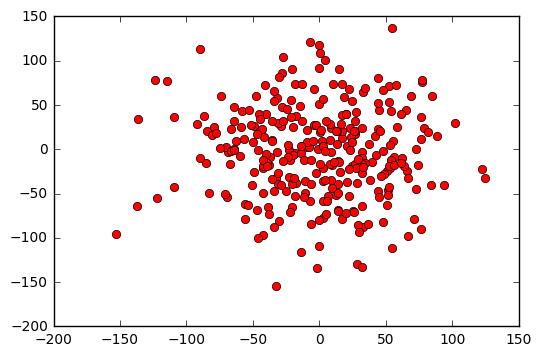

In [136]:
show_plot(x_dots, y_dots)

In [137]:
max_iterations = 1

In [148]:
for i in range(max_iterations):
    z_dots = get_dots(x_dots, y_dots)
    z_dots.view('f8,f8,f8').sort(axis=0)
    z_dots = np.split(z_dots, 3)[2]
    x_mu = np.mean(z_dots[1]) 
    y_mu = np.mean(z_dots[2])
    print(x_mu, y_mu)
    

17.1320825481 3.95396031801
